## Exercise 2

In the `FiniteDifferences` notebook we considered the differential equation controlling heat flow which relates the rate of change in $T$, the temperature, to spatial gradients in the same quantity. 

$$
\frac{\partial T}{\partial t} = \kappa \frac{\partial^2 T}{\partial x^2} + H
$$
       
       
We ignored $H$ and solved a number of examples. 

At the end of the notebook we looked at the time-varying solution of the heat equation using an explicit finite difference approximation. Given all the trouble we went to setting this up, don't you think it would be a good idea to see if we can iterate until we reach the steady-state solution?

This is not very complicated to do so I would like you to try it __for the case where $\kappa$ is constant__.

You can copy and paste the cells from the `FiniteDifferences` here to get started.

## Hints

You have most of the code you need. The `np.gradient` function will still be useful ... in fact you really only have to put everything in a `for` loop and enforce the boundary conditions.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
nx, ny = 27, 25 # No more than nx=100, ny=100
nodes = np.arange(nx*ny).reshape(ny,nx)
dx, dy = 1., 1.

# Create matrix structures
A_matrix = np.zeros((nx*ny,nx*ny)) # square matrix
b_matrix = np.zeros(nx*ny)

# field variables
H = 2e-6
k = 3.0

# boundary conditions (constant temperature)
topBC = 300.0
bottomBC = 800.0
leftBC = 500.0
rightBC = 500.0

# boundary nodes
top_nodes = nodes[0,:]
bottom_nodes = nodes[-1,:]
left_nodes = nodes[1:-1,0]
right_nodes = nodes[1:-1,-1]

for idx in top_nodes:
    A_matrix[idx, idx] = 1.0
    b_matrix[idx] = topBC
for idx in bottom_nodes:
    A_matrix[idx, idx] = 1.0
    b_matrix[idx] = bottomBC
for idx in left_nodes:
    A_matrix[idx, idx] = 1.0
    b_matrix[idx] = leftBC
for idx in right_nodes:
    A_matrix[idx, idx] = 1.0
    b_matrix[idx] = rightBC

bmask = np.zeros_like(nodes, dtype=bool)
bmask[1:-1,1:-1] = True # these are nodes that do not intersect the boundary

for idx in nodes[bmask]:
    A_matrix[idx, idx-nx] = k/dy**2
    A_matrix[idx, idx-1]  = k/dx**2
    A_matrix[idx, idx]    = -2*k/dx**2 -2*k/dy**2
    A_matrix[idx, idx+1]  = k/dx**2
    A_matrix[idx, idx+nx] = k/dy**2
    
    b_matrix[idx] = -H

print (A_matrix)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


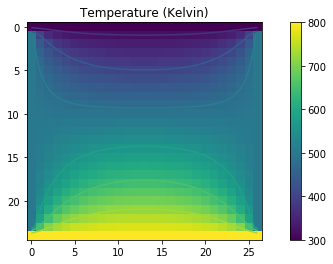

In [5]:
temperature = np.linalg.solve(A_matrix, b_matrix) # solve x matrix

fig = plt.figure(1, figsize=(10,4))
ax1 = fig.add_subplot(111)

im = ax1.imshow(temperature.reshape(ny,nx))
ax1.set_title('Temperature (Kelvin)')
ax1.contour(temperature.reshape(ny,nx)) # Lets plot some contours

fig.colorbar(im)
plt.show()

In [6]:


T = np.zeros((ny,nx))
T_new = T.copy()
time = 0.0
# Initial conditions
#wrap up in a for loop

for i in range (0,200):
    
    T = T_new.copy()
    
    #print(i)

    T[0,:] = 300.
    T[-1,:] = 800.


    k = 1.0

    # 1 timestep
    gradTx, gradTy = np.gradient(T, dx, dy)
    flux_x = k*gradTx
    flux_y = k*gradTy

    gradTxx, gradTxy = np.gradient(flux_x, dx, dy)
    gradTyx, gradTyy = np.gradient(flux_y, dx, dy)

    divT = gradTxx + gradTyy
    dt = (dx*dy)/k
    time += dt

    T_new = T + dt*divT


#what timestep size is a good trade-off. We want a large size but we want it to be stable.


    
    
    
    

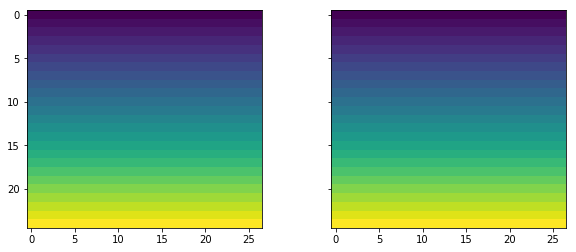

In [7]:
#change timestep size and create dif graphs.

fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10,4))
ax1.imshow(T)
ax2.imshow(T_new)

We know that there is an instability in the code which occurs if the timestep is too large. Currently the timestep size is related to the size of the mesh and the diffusivity:

$$
\Delta t = \frac{\Delta x \Delta y}{\kappa}
$$


What happens if you overwrite the timestep size, `dt`? What is the point where the solution begins to breakdown and you see wild oscillations? Is it pretty close to the above relation?

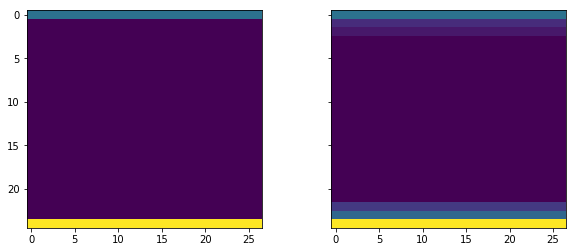

In [9]:
T = np.zeros((ny,nx))
# Initial conditions
T[0,:] = 300.
T[-1,:] = 800.

k = 1.0

# 1 timestep
time = 0.0
gradTx, gradTy = np.gradient(T, dx, dy)
flux_x = k*gradTx
flux_y = k*gradTy

gradTxx, gradTxy = np.gradient(flux_x, dx, dy)
gradTyx, gradTyy = np.gradient(flux_y, dx, dy)

divT = gradTxx + gradTyy
dt = (dx*dy)/k
time += dt

T_new = T + dt*divT

fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10,4))
ax1.imshow(T)
ax2.imshow(T_new)

Text(0.5, 1.0, 'dt = 20')

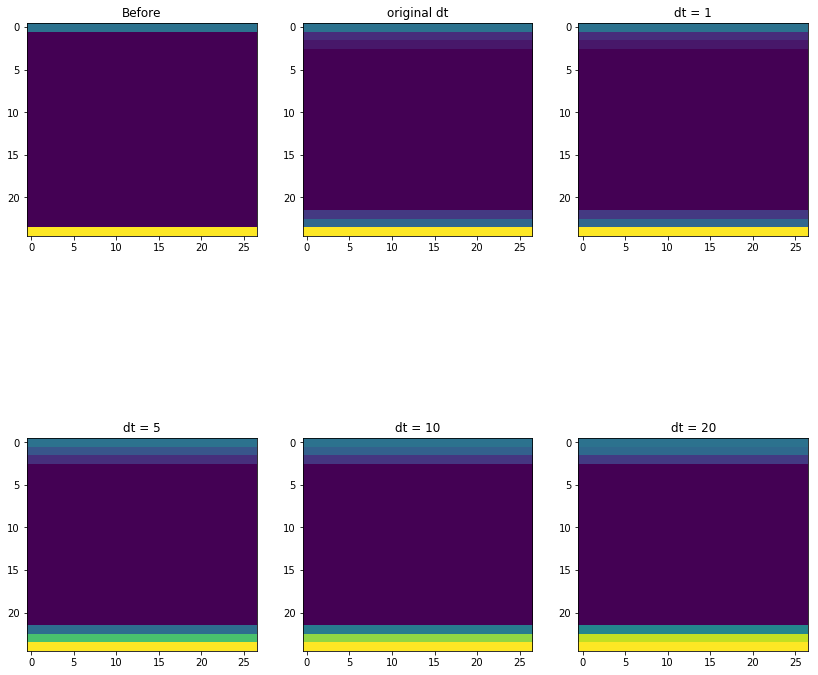

In [36]:
T = np.zeros((ny,nx))
# Initial conditions
T[0,:] = 300.
T[-1,:] = 800.

k = 1.0

# 1 timestep
time = 0.0
gradTx, gradTy = np.gradient(T, dx, dy)
flux_x = k*gradTx
flux_y = k*gradTy

gradTxx, gradTxy = np.gradient(flux_x, dx, dy)
gradTyx, gradTyy = np.gradient(flux_y, dx, dy)

divT = gradTxx + gradTyy
dt = (dx*dy)/k
dt2 = 1
dt3 = 5
dt4 = 10
dt5 = 20
time += dt

T_new = T + dt*divT
T_new2 = T + dt2*divT
T_new3 = T + dt3*divT
T_new4 = T + dt4*divT
T_new5 = T + dt5*divT
fig, axes = plt.subplots(ncols=3, nrows=2)
ax1, ax2, ax3, ax4, ax5, ax6 =axes.ravel()
fig.set_size_inches((14,14))

#fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10,4))
ax1.imshow(T)
ax1.set_title('Before')

ax2.imshow(T_new)
ax2.set_title('original dt')

ax3.imshow(T_new2)
ax3.set_title('dt = 1')

ax4.imshow(T_new3)
ax4.set_title('dt = 5')

ax5.imshow(T_new4)
ax5.set_title('dt = 10')

ax6.imshow(T_new5)
ax6.set_title('dt = 20')

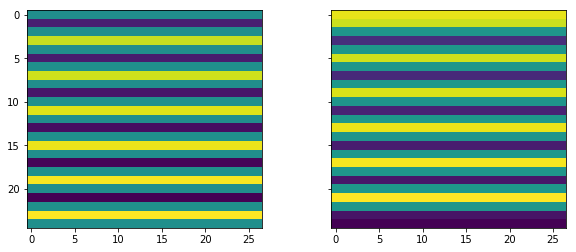

In [43]:


T = np.zeros((ny,nx))
T_new = T.copy()
time = 0.0
# Initial conditions
#wrap up in a for loop

for i in range (0,200):
    
    T = T_new.copy()
    
    #print(i)

    T[0,:] = 300.
    T[-1,:] = 800.


    k = 1.0

    # 1 timestep
    gradTx, gradTy = np.gradient(T, dx, dy)
    flux_x = k*gradTx
    flux_y = k*gradTy

    gradTxx, gradTxy = np.gradient(flux_x, dx, dy)
    gradTyx, gradTyy = np.gradient(flux_y, dx, dy)

    divT = gradTxx + gradTyy
    dt = 10
    time += dt

    T_new = T + dt*divT

fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10,4))
ax1.imshow(T)
ax2.imshow(T_new)

#what timestep size is a good trade-off. We want a large size but we want it to be stable.



10 does not reach a steady state solution





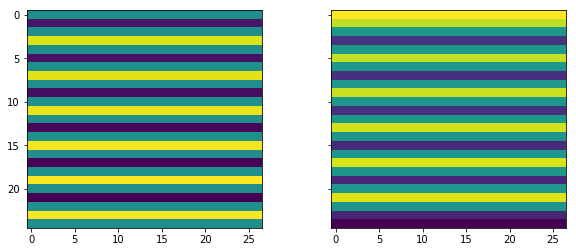

In [44]:


T = np.zeros((ny,nx))
T_new = T.copy()
time = 0.0
# Initial conditions
#wrap up in a for loop

for i in range (0,200):
    
    T = T_new.copy()
    
    #print(i)

    T[0,:] = 300.
    T[-1,:] = 800.


    k = 1.0

    # 1 timestep
    gradTx, gradTy = np.gradient(T, dx, dy)
    flux_x = k*gradTx
    flux_y = k*gradTy

    gradTxx, gradTxy = np.gradient(flux_x, dx, dy)
    gradTyx, gradTyy = np.gradient(flux_y, dx, dy)

    divT = gradTxx + gradTyy
    dt = 5
    time += dt

    T_new = T + dt*divT

fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10,4))
ax1.imshow(T)
ax2.imshow(T_new)

#what timestep size is a good trade-off. We want a large size but we want it to be stable.

5 doesnt work well either

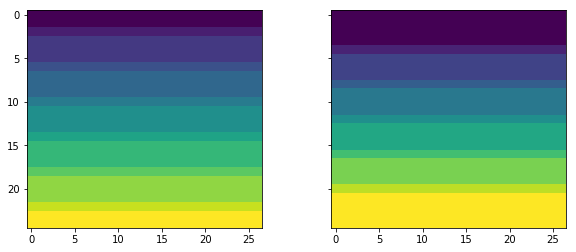

In [45]:
T = np.zeros((ny,nx))
T_new = T.copy()
time = 0.0
# Initial conditions
#wrap up in a for loop

for i in range (0,200):
    
    T = T_new.copy()
    
    #print(i)

    T[0,:] = 300.
    T[-1,:] = 800.


    k = 1.0

    # 1 timestep
    gradTx, gradTy = np.gradient(T, dx, dy)
    flux_x = k*gradTx
    flux_y = k*gradTy

    gradTxx, gradTxy = np.gradient(flux_x, dx, dy)
    gradTyx, gradTyy = np.gradient(flux_y, dx, dy)

    divT = gradTxx + gradTyy
    dt = 2
    time += dt

    T_new = T + dt*divT

fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10,4))
ax1.imshow(T)
ax2.imshow(T_new)

#what timestep size is a good trade-off. We want a large size but we want it to be stable.

A timestep of two is much better than five, however it is still not as good as a timestep of 1

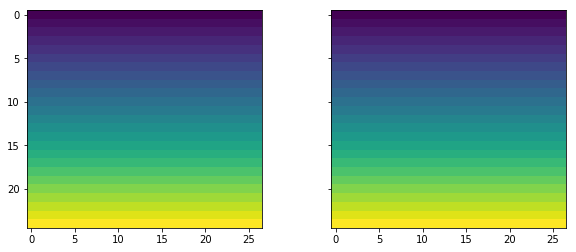

In [46]:
T = np.zeros((ny,nx))
T_new = T.copy()
time = 0.0
# Initial conditions
#wrap up in a for loop

for i in range (0,200):
    
    T = T_new.copy()
    
    #print(i)

    T[0,:] = 300.
    T[-1,:] = 800.


    k = 1.0

    # 1 timestep
    gradTx, gradTy = np.gradient(T, dx, dy)
    flux_x = k*gradTx
    flux_y = k*gradTy

    gradTxx, gradTxy = np.gradient(flux_x, dx, dy)
    gradTyx, gradTyy = np.gradient(flux_y, dx, dy)

    divT = gradTxx + gradTyy
    dt = 1
    time += dt

    T_new = T + dt*divT

fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10,4))
ax1.imshow(T)
ax2.imshow(T_new)

#what timestep size is a good trade-off. We want a large size but we want it to be stable.

A timestep of 1 reaches the steady state solution nicely